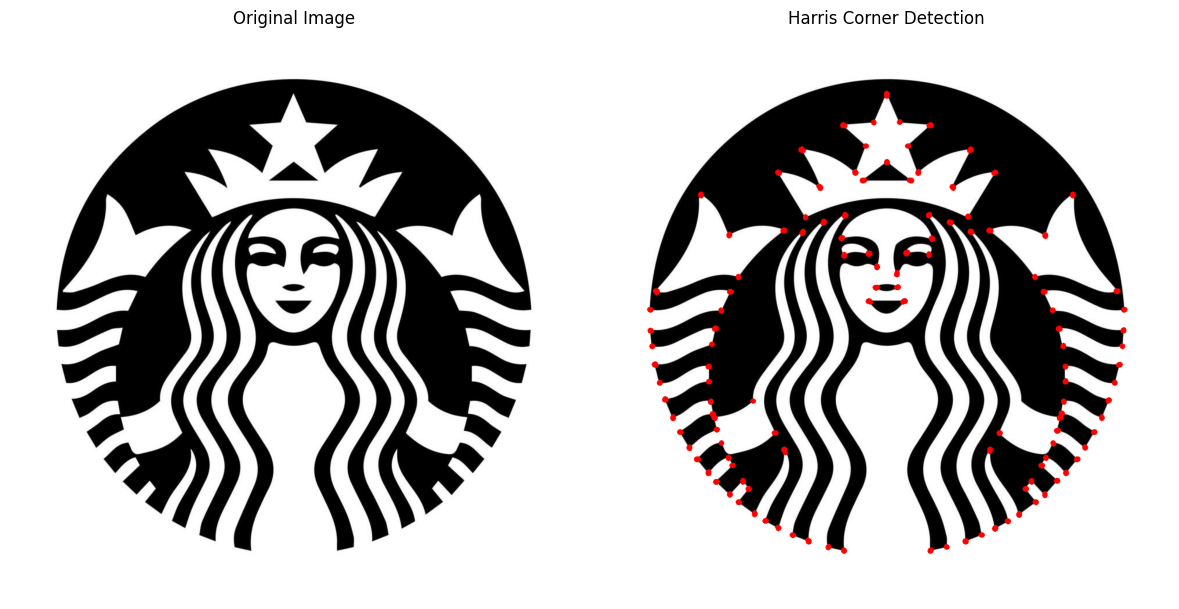

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('image_1.jpg')
if img is None:
    raise ValueError("Image not found.")

# Make a copy for before/after comparison
original_img = img.copy()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Harris Corner detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

# Threshold and draw large red dots
threshold = 0.005
corner_coords = np.argwhere(dst > threshold * dst.max())
for y, x in corner_coords:
    cv2.circle(img, (x, y), radius=3, color=(0, 0, 255), thickness=-1)

# Display original and corner-detected images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

plt.tight_layout()
plt.show()
